In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('ggplot')
%pip install -U nltk
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mvska\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mvska\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\mvska\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [28]:
new_df=pd.read_csv('new_df.csv')

In [29]:
new_df.head()

,id,asin,title,review,rating,roberta_neg,roberta_neu,roberta_pos
0,R26PNFZQ47YLT1,B00E4MSGO2,Great lotion for itching,I have been battling hives for the last few mo...,5,0.042929,0.221442,0.735628
1,R200LS8OC0RK83,B00E4MSGO2,It hasn't un-pinched the nerve but it does giv...,I have a dry itchy patch of skin on my back wh...,5,0.022029,0.213031,0.764940
2,R4QOCGJTF8CU3,B00E4MSGO2,Dermatology Recommend,Using this product for my husband and MIL she ...,5,0.034209,0.225271,0.740520
3,R2DITTAM3PKJQ8,B00E4MSGO2,Works for itchy skin,Works really well for areas of itchy skin.,5,0.003824,0.060801,0.935375
4,R2DIVM79Z2G2L7,B00E4MSGO2,Chestnut,Just what I needed.,5,0.008111,0.108295,0.883594


In [30]:
new_df['asin'].nunique()

10

In [31]:
new_df['good']=0
new_df['bad']=0

In [32]:
new_df.head()

,id,asin,title,review,rating,roberta_neg,roberta_neu,roberta_pos,good,bad
0,R26PNFZQ47YLT1,B00E4MSGO2,Great lotion for itching,I have been battling hives for the last few mo...,5,0.042929,0.221442,0.735628,0,0
1,R200LS8OC0RK83,B00E4MSGO2,It hasn't un-pinched the nerve but it does giv...,I have a dry itchy patch of skin on my back wh...,5,0.022029,0.213031,0.764940,0,0
2,R4QOCGJTF8CU3,B00E4MSGO2,Dermatology Recommend,Using this product for my husband and MIL she ...,5,0.034209,0.225271,0.740520,0,0
3,R2DITTAM3PKJQ8,B00E4MSGO2,Works for itchy skin,Works really well for areas of itchy skin.,5,0.003824,0.060801,0.935375,0,0
4,R2DIVM79Z2G2L7,B00E4MSGO2,Chestnut,Just what I needed.,5,0.008111,0.108295,0.883594,0,0


In [33]:
print(new_df.columns)

if 'roberta_pos' not in new_df.columns:
    new_df['roberta_pos'] = 0

for i in range(len(new_df)):
    if new_df.loc[i, 'roberta_neu'] > new_df.loc[i, 'roberta_pos'] and new_df.loc[i, 'roberta_neu'] > new_df.loc[i, 'roberta_neg']:
        new_df['good'][i] = 1
    elif new_df.loc[i, 'roberta_pos'] > new_df.loc[i, 'roberta_neg']:
        new_df['good'][i] = 1
    elif new_df.loc[i, 'roberta_pos'] < new_df.loc[i, 'roberta_neg']:
        new_df['bad'][i] = 1


Index(['id', 'asin', 'title', 'review', 'rating', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'good', 'bad'],
      dtype='object')


C:\Users\mvska\AppData\Local\Temp\ipykernel_29404\2099039117.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_df['good'][i] = 1
C:\Users\mvska\AppData\Local\Temp\ipykernel_29404\2099039117.py:19: SettingWithCopyWarning: 
A value is t

In [35]:
new_df['asin'].nunique()

10

In [36]:
new_df.head()

,id,asin,title,review,rating,roberta_neg,roberta_neu,roberta_pos,good,bad
0,R26PNFZQ47YLT1,B00E4MSGO2,Great lotion for itching,I have been battling hives for the last few mo...,5,0.042929,0.221442,0.735628,1,0
1,R200LS8OC0RK83,B00E4MSGO2,It hasn't un-pinched the nerve but it does giv...,I have a dry itchy patch of skin on my back wh...,5,0.022029,0.213031,0.764940,1,0
2,R4QOCGJTF8CU3,B00E4MSGO2,Dermatology Recommend,Using this product for my husband and MIL she ...,5,0.034209,0.225271,0.740520,1,0
3,R2DITTAM3PKJQ8,B00E4MSGO2,Works for itchy skin,Works really well for areas of itchy skin.,5,0.003824,0.060801,0.935375,1,0
4,R2DIVM79Z2G2L7,B00E4MSGO2,Chestnut,Just what I needed.,5,0.008111,0.108295,0.883594,1,0


In [37]:
new_df['asin'].nunique()

10

In [38]:
new_df.groupby('asin')['bad'].sum()

asin
B000CSG5TU     94
B000VPPUEA    105
B001ES8GGC     82
B002VWK10E     23
B005ALUJBY     14
B008VPD6IE     14
B00DUGURH2     79
B00E4MSGO2     16
B00SZ861JS     14
B01IAI4NJ2     51
Name: bad, dtype: int64

In [51]:
# new_df.groupby('asin')[['good', 'bad']].sum() / new_df.groupby('asin')[['good', 'bad']].sum().sum(axis=1).values.reshape(-1, 1)

new_df.groupby('asin')[['good', 'bad']].sum() / new_df.groupby('asin')[['good', 'bad']].sum().sum(axis=1).values.reshape(-1, 1) * 100

,good,bad
asin,,
B000CSG5TU,68.350168,31.649832
B000VPPUEA,63.793103,36.206897
B001ES8GGC,67.460317,32.539683
B002VWK10E,84.027778,15.972222
B005ALUJBY,88.429752,11.570248
B008VPD6IE,87.272727,12.727273
B00DUGURH2,63.255814,36.744186
B00E4MSGO2,87.692308,12.307692
B00SZ861JS,89.147287,10.852713


<Axes: xlabel='asin'>

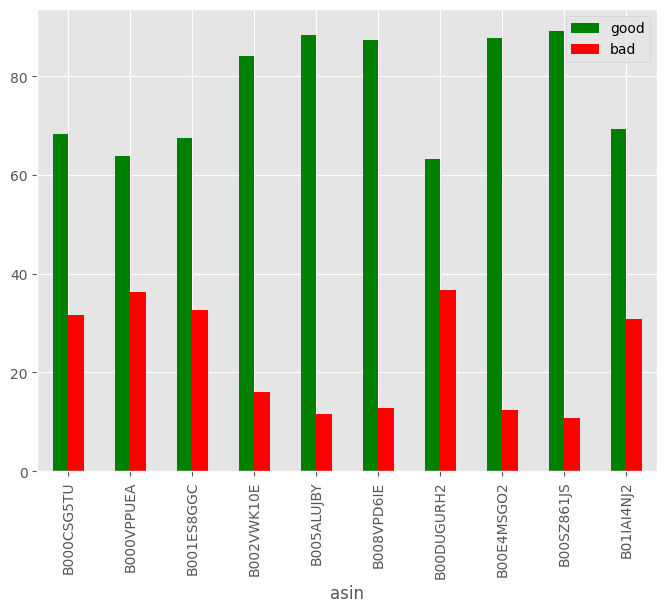

In [50]:
#plotting a grpah of the percentage of good and bad for unique 'asin' entry
ax = new_df.groupby('asin')[['good', 'bad']].sum() / new_df.groupby('asin')[['good', 'bad']].sum().sum(axis=1).values.reshape(-1, 1) * 100
ax.plot(kind='bar',color=['green', 'red'], figsize=(8, 6))
